In [5]:
import csv
from matplotlib import pyplot
import pandas as pd


In [25]:
with open('Quincy_race_preds.csv', 'r') as f:
    data = list(csv.reader(f))
    races = [[i[7], i[0]] for i in data[1::]]
print(len(races))

# add other town data
with open('Lowell_race_preds.csv', 'r') as f:
    data = list(csv.reader(f))
    races = races + [[i[7], i[0]] for i in data[1::]]

with open('NB2_race_preds.csv', 'r') as f:
    data = list(csv.reader(f))
    races = races + [[i[7], i[0]] for i in data[1::]]
    
with open('Worcester_race_preds.csv', 'r') as f:
    data = list(csv.reader(f))
    races = races + [[i[7], i[0]] for i in data[1::]]
print(len(races))

with open('finalData/State_race_preds.csv', 'r') as f:
    data = list(csv.reader(f))
    print(data[1][20])
    print(data[1][7])
    races = races + [[i[20], i[7]] for i in data[1::]]
print(len(races))


308
4388
GreaterEuropean,WestEuropean,Italian
45150.95
33677


4388


33677
[293, 38, 150, 273, 115, 24370, 454, 1640, 1161, 130, 1662, 3158, 233]


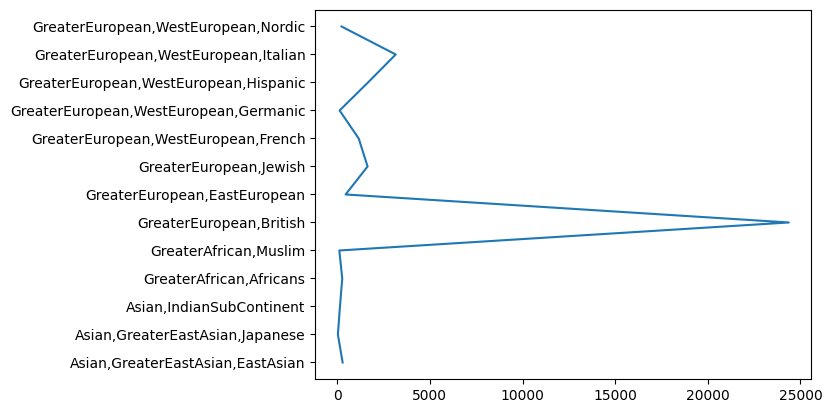

[29506, 1640, 388, 1662, 331, 150]


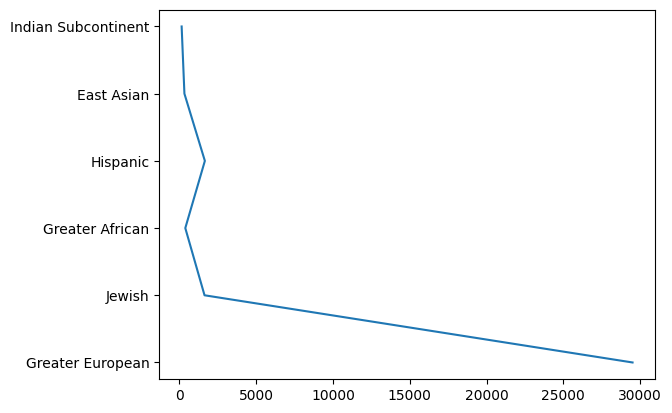

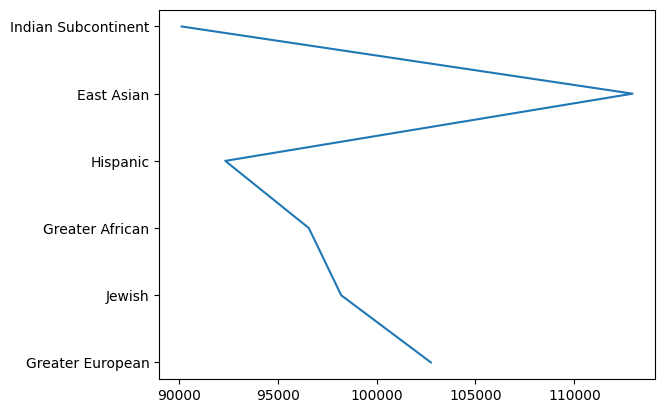

['Asian,GreaterEastAsian,EastAsian', 'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent', 'GreaterAfrican,Africans', 'GreaterAfrican,Muslim', 'GreaterEuropean,British', 'GreaterEuropean,EastEuropean', 'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French', 'GreaterEuropean,WestEuropean,Germanic', 'GreaterEuropean,WestEuropean,Hispanic', 'GreaterEuropean,WestEuropean,Italian', 'GreaterEuropean,WestEuropean,Nordic']
[112943.46754266205, 100817.78315789474, 90139.84886666664, 103171.08054945058, 89973.44147826087, 105681.59724333088, 100575.04328193834, 98210.3608719512, 101080.44608957796, 96628.45030769226, 92345.89178098668, 103026.23464534525, 109498.45042918458]


<BarContainer object of 6 artists>

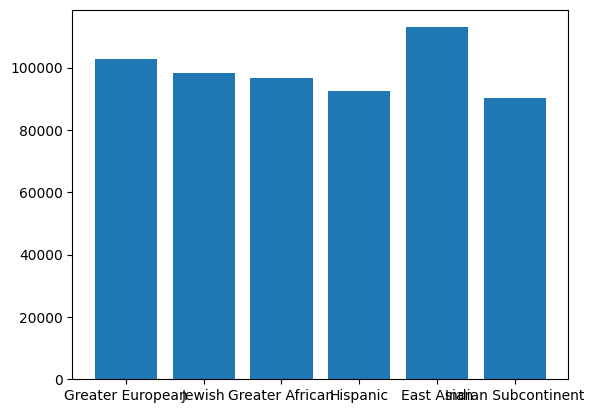

In [26]:
print(len(races))
import matplotlib
options = ["Asian,GreaterEastAsian,EastAsian","Asian,GreaterEastAsian,Japanese","Asian,IndianSubContinent","GreaterAfrican,Africans","GreaterAfrican,Muslim","GreaterEuropean,British","GreaterEuropean,EastEuropean","GreaterEuropean,Jewish","GreaterEuropean,WestEuropean,French","GreaterEuropean,WestEuropean,Germanic","GreaterEuropean,WestEuropean,Hispanic","GreaterEuropean,WestEuropean,Italian","GreaterEuropean,WestEuropean,Nordic"]

counts =[]
sals =[]
for option in options:
    count = 0
    avg_sal = 0
    for race in races:
        if race[0] == option:
            count +=1
            avg_sal += float(race[1].replace(',',''))
    if count ==0:
        sals.append(0)
    else:
        sals.append(avg_sal/count)
    counts.append(count)

print(counts)
pyplot.plot(counts, options)
pyplot.show()

diff_categories = ['Greater European', 'Jewish', 'Greater African', 'Hispanic', 'East Asian', 'Indian Subcontinent']
counts_for_new_cats = [(counts[12]+counts[11]+counts[9]+counts[8]+counts[6]+counts[5]), counts[7], counts[3]+counts[4],counts[10],counts[0]+counts[1],counts[2]]
sals_for_new_cats = [(sals[12]+sals[11]+sals[9]+sals[8]+sals[6]+sals[5])/6, sals[7], (sals[3]+sals[4])/2,sals[10],(sals[0]),sals[2]]
print(counts_for_new_cats)

pyplot.plot(counts_for_new_cats, diff_categories)
pyplot.show()

pyplot.plot(sals_for_new_cats, diff_categories)
pyplot.show()

print(options)
print(sals)

matplotlib.pyplot.bar(diff_categories, sals_for_new_cats, width=0.8)


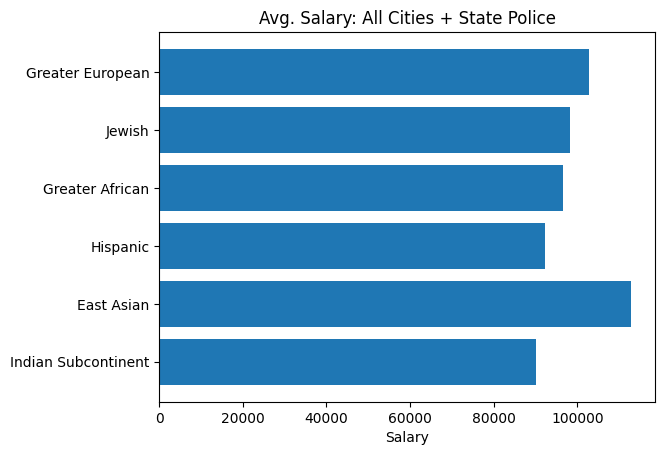

In [29]:
import matplotlib
import numpy as np

pyplot.rcdefaults()
fig, ax = pyplot.subplots()
y_pos = np.arange(len(diff_categories))

ax.barh(y_pos, sals_for_new_cats)
ax.set_yticks(y_pos)
ax.set_yticklabels(diff_categories)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Salary')
ax.set_title('Avg. Salary: All Cities + State Police')
pyplot.savefig('all_cities+state_avg_sal_by_race.pdf')





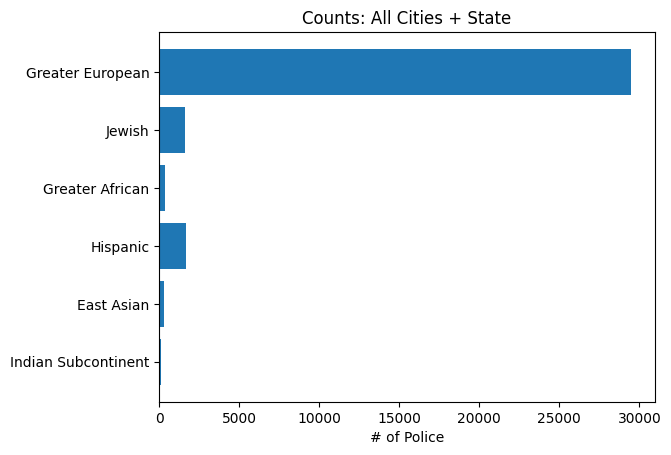

In [31]:
fig0, ax0 = pyplot.subplots()
y_pos0 = np.arange(len(diff_categories))

ax0.barh(y_pos0, counts_for_new_cats)
ax0.set_yticks(y_pos0)
ax0.set_yticklabels(diff_categories)
ax0.invert_yaxis()  # labels read top-to-bottom
ax0.set_xlabel('# of Police')
ax0.set_title('Counts: All Cities + State')
pyplot.savefig('all_cities+state_counts_by_race.pdf')